In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [140]:
df = pd.read_csv("titanic_data.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### About Dataset

In [141]:
# Shape of the dataset
print(df.shape)
print("-"*100)


# Size of the Dataset
print(df.size)
print("-"*100)


# data type of columns
print(df.dtypes)
print("-"*100)


(891, 12)
----------------------------------------------------------------------------------------------------
10692
----------------------------------------------------------------------------------------------------
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
----------------------------------------------------------------------------------------------------


In [142]:
# Data type of Columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [143]:
# Description of the Numerical data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [144]:
# Description of the Object data
display(df.describe(include = object))

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [145]:
# Duplicated Values in the data
print("\nExact duplicate rows:", df.duplicated().sum())


Exact duplicate rows: 0


In [146]:
# Information about each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning the Data

### Handling Null Values

In [147]:
# Null Values in the Data
ab = df.isna().sum().sort_values()
ab[ab>0]

Embarked      2
Age         177
Cabin       687
dtype: int64

In [148]:
df = df.drop(columns = ["Cabin"])

In [149]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [150]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [151]:
## Values after Null Value Handling
print("After cleaning Missing Values are:",df.isna().sum())

After cleaning Missing Values are: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Fixing Data Type

In [152]:
df['Pclass'] = df['Pclass'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [153]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

### Adding new Features

In [154]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [155]:
df['IsAlone'] = (df['Family'] == 1).astype(int)

## Data Visualization

In [156]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

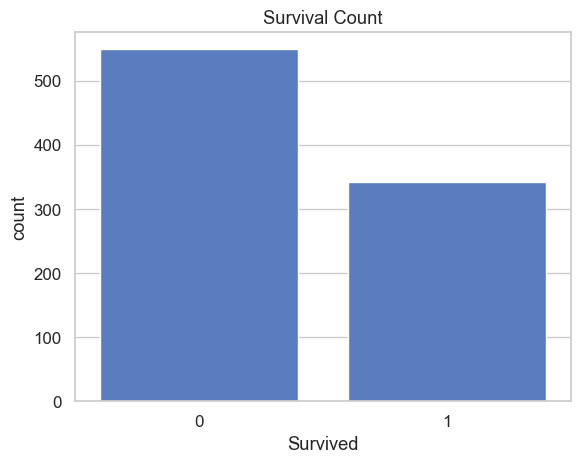

In [157]:
# Survival Distribution

sns.countplot(x = 'Survived',data = df)
plt.title('Survival Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

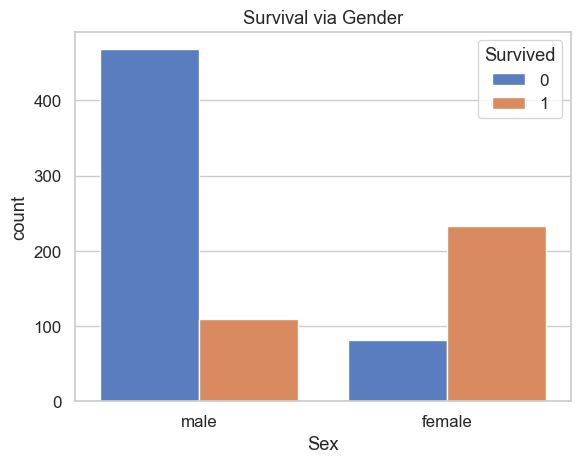

In [158]:
# Survival by Gender

sns.countplot(x = 'Sex',hue = 'Survived',data = df)
plt.title('Survival via Gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

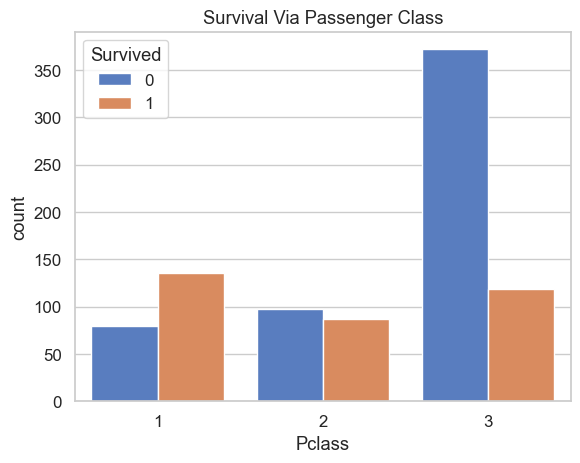

In [159]:
# Survival by Passenger Class
sns.countplot(x = 'Pclass', hue = 'Survived' , data = df)
plt.title("Survival Via Passenger Class")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

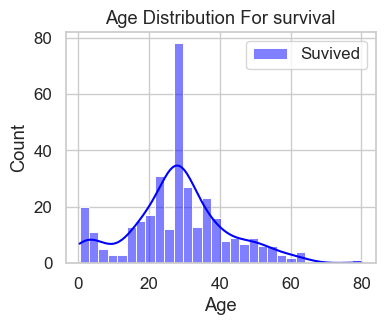

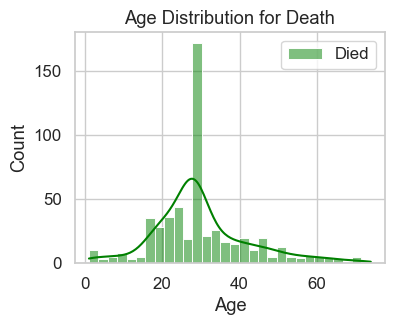

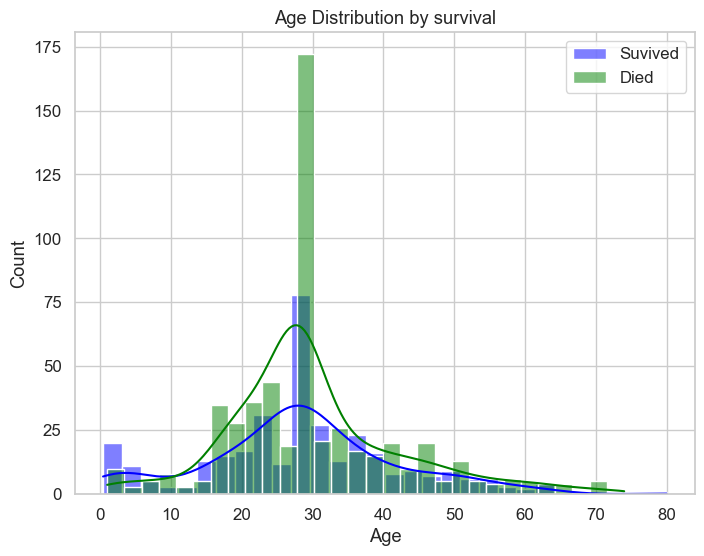

In [160]:
## Age Distribution
plt.figure(figsize= (4,3))
sns.histplot(df[df['Survived'] == 1]['Age'],bins = 30, kde = True, color = 'blue',label = 'Suvived')
plt.legend()
plt.title('Age Distribution For survival')
plt.show



plt.figure(figsize= (4,3))
sns.histplot(df[df['Survived'] == 0]['Age'],bins = 30, kde = True, color = 'green',label = 'Died'  )
plt.legend()
plt.title('Age Distribution for Death')
plt.show


plt.figure(figsize= (8,6))
sns.histplot(df[df['Survived'] == 1]['Age'],bins = 30, kde = True, color = 'blue',label = 'Suvived')
sns.histplot(df[df['Survived'] == 0]['Age'],bins = 30, kde = True, color = 'green',label = 'Died'  )
plt.legend()
plt.title('Age Distribution by survival')
plt.show

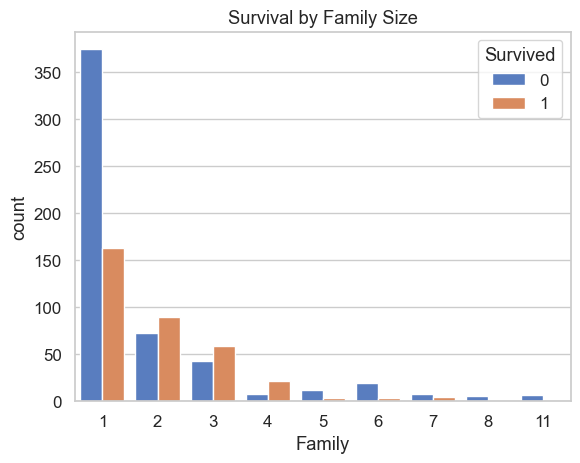

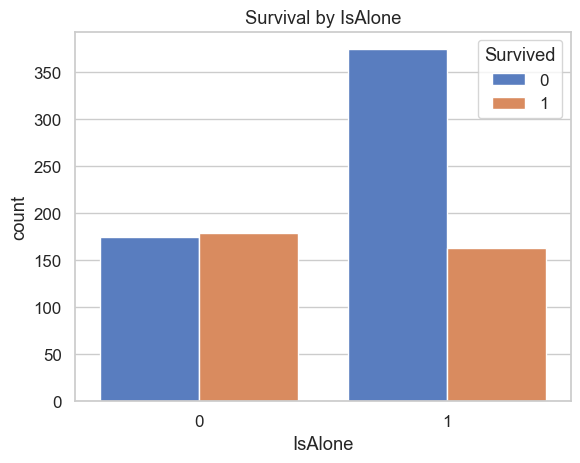

In [161]:
sns.countplot(x='Family', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()

sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.title("Survival by IsAlone")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

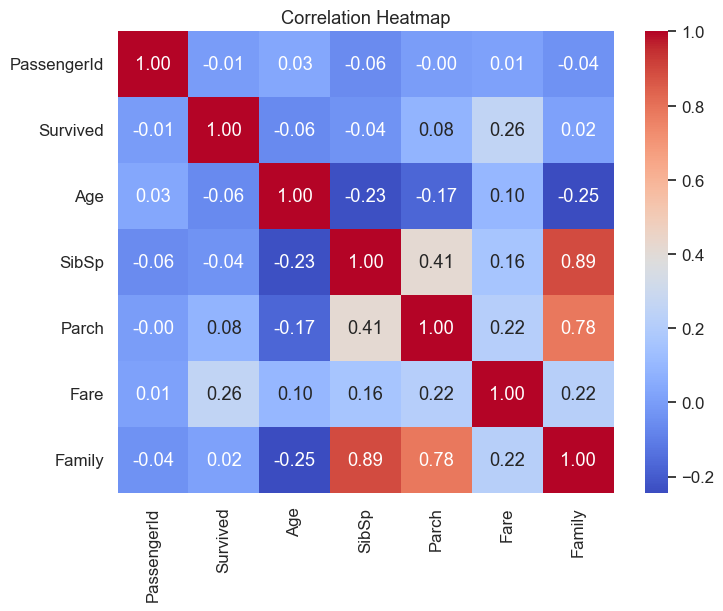

In [162]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize = (8,6))
sns.heatmap(numeric_df.corr(),annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show

### Outlier Detection

<function matplotlib.pyplot.show(close=None, block=None)>

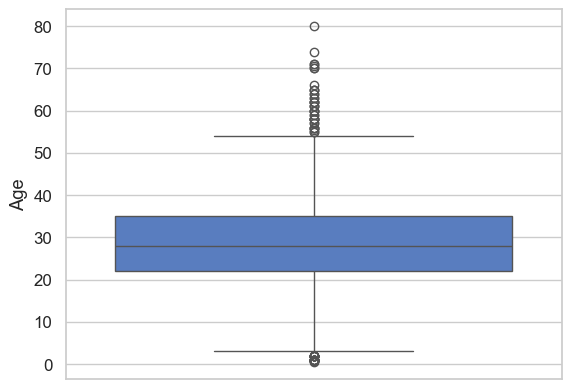

In [163]:
sns.boxplot(df['Age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

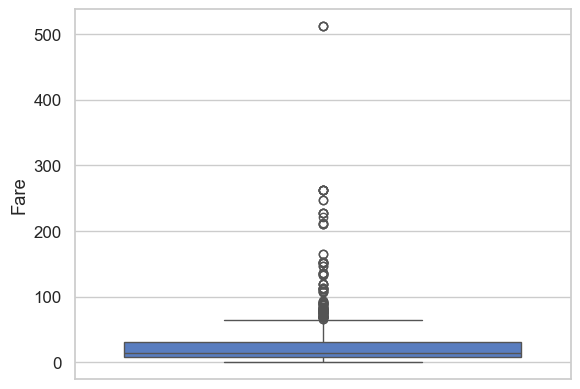

In [164]:
sns.boxplot(df['Fare'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

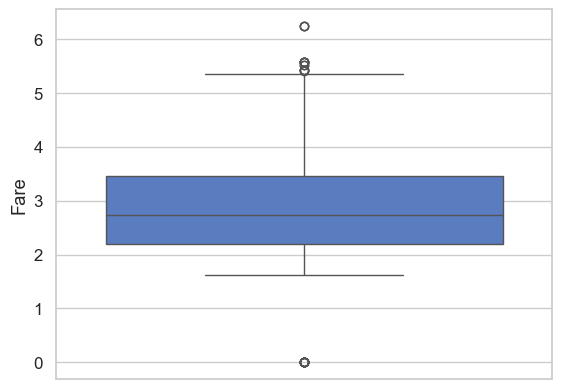

In [165]:
df['Fare'] = df['Fare'].apply(lambda x: np.log(x+1))
sns.boxplot(df['Fare'])
plt.show

### Feature Engineering

#### Encode Categorical Variables

In [166]:
# Sex Column
df['Sex'] = df['Sex'].map({'male' :0, 'female':1}) 

In [167]:
# Embarked
df = pd.get_dummies(df, columns = ['Embarked'], drop_first = True)

#### Drop unnecessary Columns

In [168]:
df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

In [169]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,IsAlone,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,2.110213,2,0,False,True
1,1,1,1,38.0,1,0,4.280593,2,0,False,False
2,1,3,1,26.0,0,0,2.188856,1,1,False,True
3,1,1,1,35.0,1,0,3.990834,2,0,False,True
4,0,3,0,35.0,0,0,2.202765,1,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,2.639057,1,1,False,True
887,1,1,1,19.0,0,0,3.433987,1,1,False,True
888,0,3,1,28.0,1,2,3.196630,4,0,False,True
889,1,1,0,26.0,0,0,3.433987,1,1,False,False


In [171]:
Scalar = StandardScaler()
df[['Age','Fare']]= Scalar.fit_transform(df[['Age','Fare']])

# Label Encoding
label = LabelEncoder()
df['Embarked_Q'] = label.fit_transform(df['Embarked_Q'])

df['Embarked_S'] = label.fit_transform(df['Embarked_S'])

In [180]:
x = df.drop('Survived',axis= 1)    # independent Variables
y = df['Survived']                 # Target Variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [186]:
log_reg = LogisticRegression(max_iter = 500)

log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [187]:
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

In [188]:
# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.800561797752809
Testing Accuracy: 0.7988826815642458

Confusion Matrix:
 [[89 16]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

